<ipython-input-2-c7952545e001>:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv(file_path)


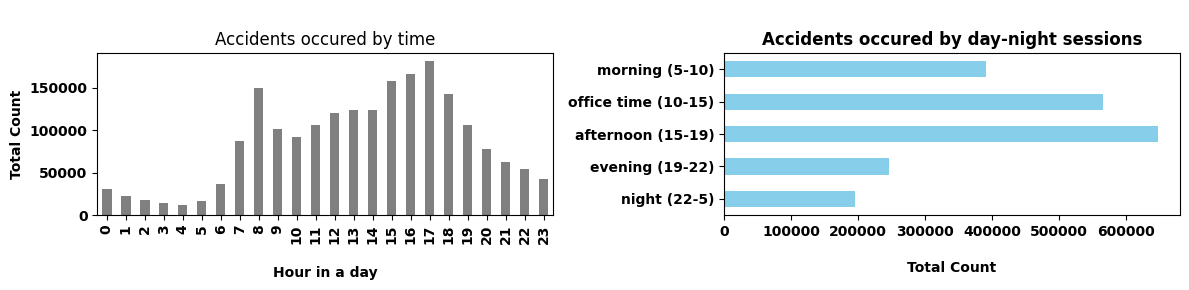

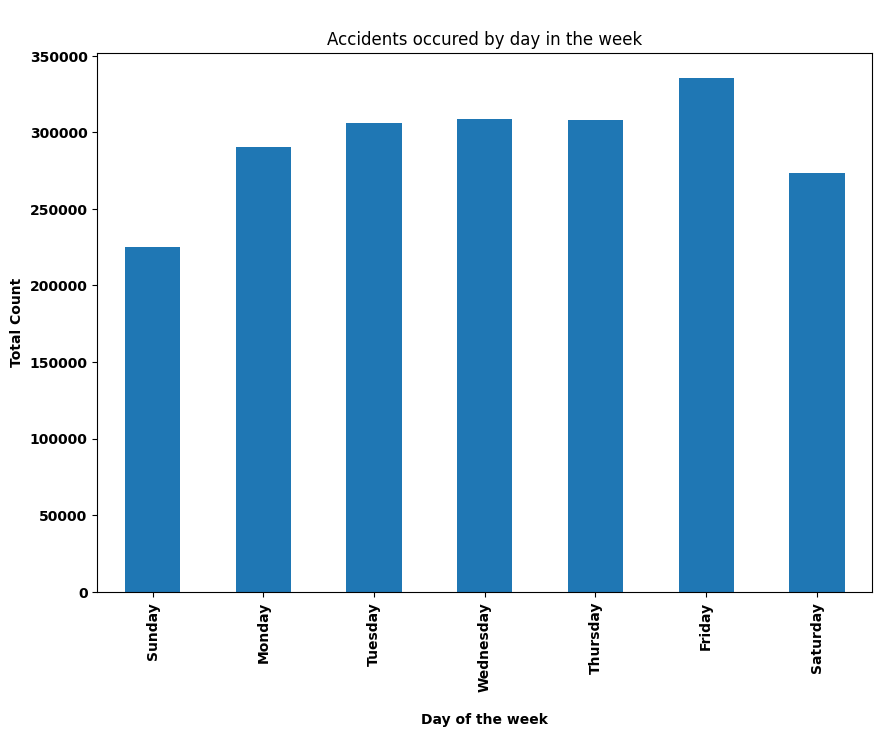

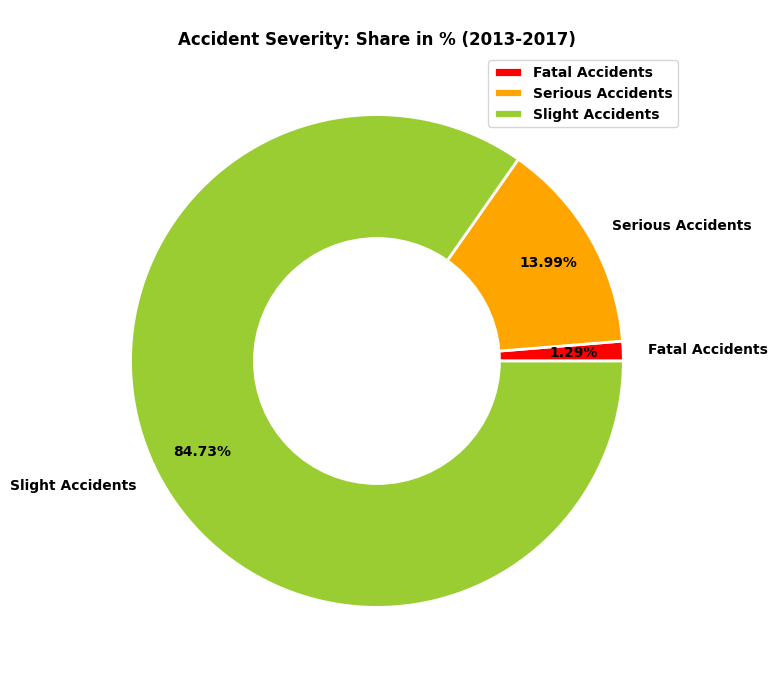

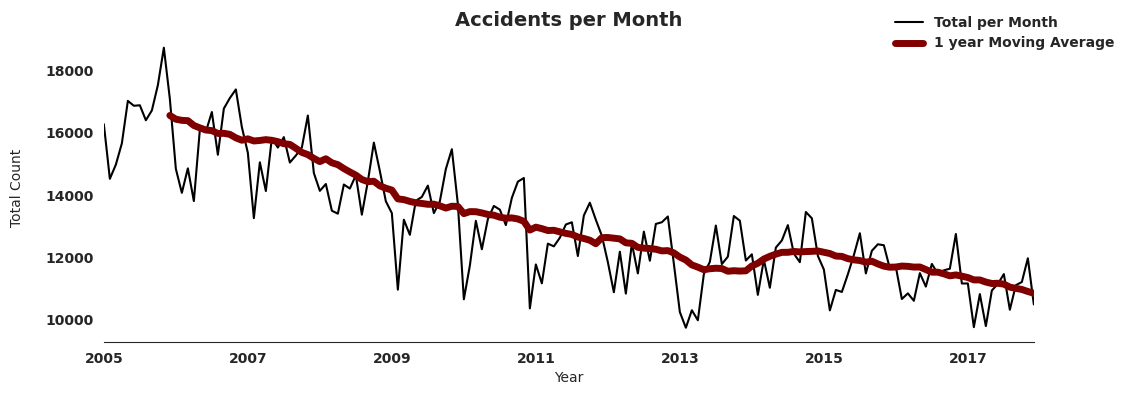

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.weight'] = 'bold'

file_path = 'Accident_Information.csv'

data_frame = pd.read_csv(file_path)

#DATA PREPROCESSING
#Considering columns with significant importance for detail analysis
col = ['Accident_Severity', 'Date', 'Day_of_Week', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Year']
data = data_frame[col]

#Dropping Null Values
data = data.dropna()

#Grouping the 24 hours time foramt to day-night sessions
data['Hour'] = data['Time'].str[0:2]
data['Hour'] = pd.to_numeric(data['Hour'])

#function to group time
def group_time(time):
    if time >= 5 and time < 10:
        return "morning (5-10)"
    elif time >= 10 and time < 15:
        return "office time (10-15)"
    elif time >= 15 and time < 19:
        return "afternoon (15-19)"
    elif time >= 19 and time < 22:
        return "evening (19-22)"
    else:
        return "night (22-5)"

#Applying the function
data['time_group'] = data['Hour'].apply(group_time)
data[['Hour', 'time_group']].head()

df = data
sum_counts = df.groupby('time_group').size().reset_index(name='Sum')

#VISUALIZATION

# prepare dataframe
order = ['night (22-5)', 'evening (19-22)', 'afternoon (15-19)', 'office time (10-15)', 'morning (5-10)']
df_1 = data.groupby('Hour').size()
df_2 = data.groupby('time_group').size().reindex(order)

# Create subplots
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# Plot the first graph (grouped by 'Category')
df_1.plot(kind='bar', ax=axes[0], color='gray')
axes[0].set_title('\nAccidents occured by time')
axes[0].set_xlabel('\nHour in a day', weight='bold')
axes[0].set_ylabel('Total Count', weight='bold')

# Plot the second graph (grouped by 'Color')
df_2.plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('\nAccidents occured by day-night sessions', weight='bold')
axes[1].set_xlabel('\nTotal Count', weight='bold')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# prepare dataframe
order2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_3 = data.groupby('Day_of_Week').size().reindex(order2)

# Plotting graph
plt.figure(figsize=(10,7))
df_3.plot(kind='bar')

plt.xlabel('\nDay of the week', weight='bold')
plt.ylabel('Total Count', weight='bold')
plt.title('\nAccidents occured by day in the week')
plt.show()


# Counting the data of each accident type
fatal   = df.Accident_Severity.value_counts()['Fatal']
serious = df.Accident_Severity.value_counts()['Serious']
slight  = df.Accident_Severity.value_counts()['Slight']

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]

# Pie chart
plt.pie(x=size, labels=names, colors=['red', 'orange', 'yellowgreen'], autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold'), wedgeprops={'linewidth':2, 'edgecolor':'white'})
my_circle = plt.Circle((0,0), 0.5, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=12, fontweight='bold')
plt.legend( )
plt.show()


#Converting data into
df['Date']= pd.to_datetime(df['Date'], format="%Y-%m-%d")
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,4))

# plot
df.set_index('Date').resample('M').size().plot(label='Total per Month', color='black', ax=ax)
df.set_index('Date').resample('M').size().rolling(window=12).mean()\
                           .plot(color='maroon', linewidth=5, label='1 year Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='Year')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);